In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("IMDb Movies India.csv",encoding="latin")
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


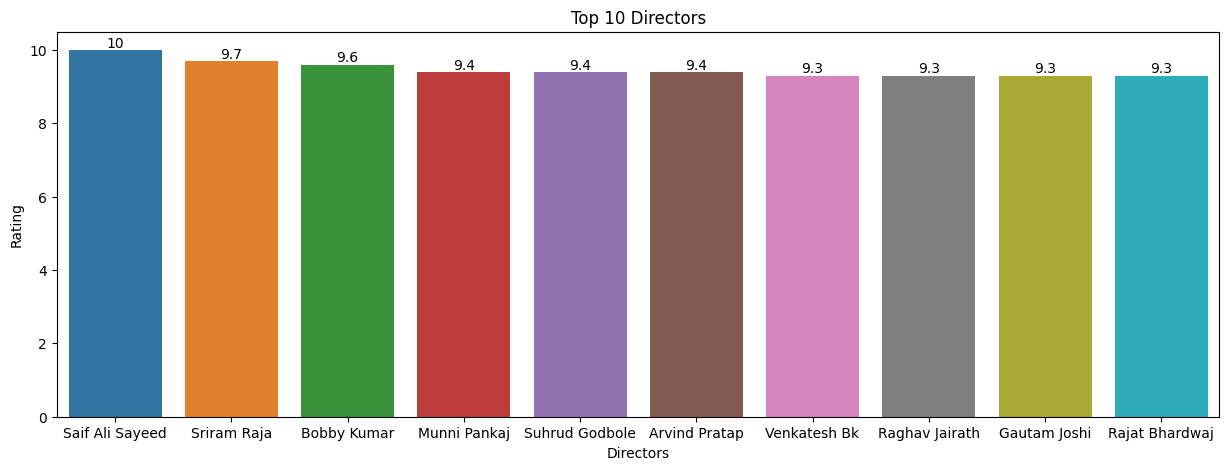

In [29]:
top10_directors=data["Director"].head(10)
plt.figure(figsize=(15,5))
bar1=sns.barplot(x=top10_directors,y=data["Rating"])
bar1.bar_label(bar1.containers[0])
plt.xlabel("Directors")
plt.ylabel("Rating")
plt.title("Top 10 Directors")
plt.show()

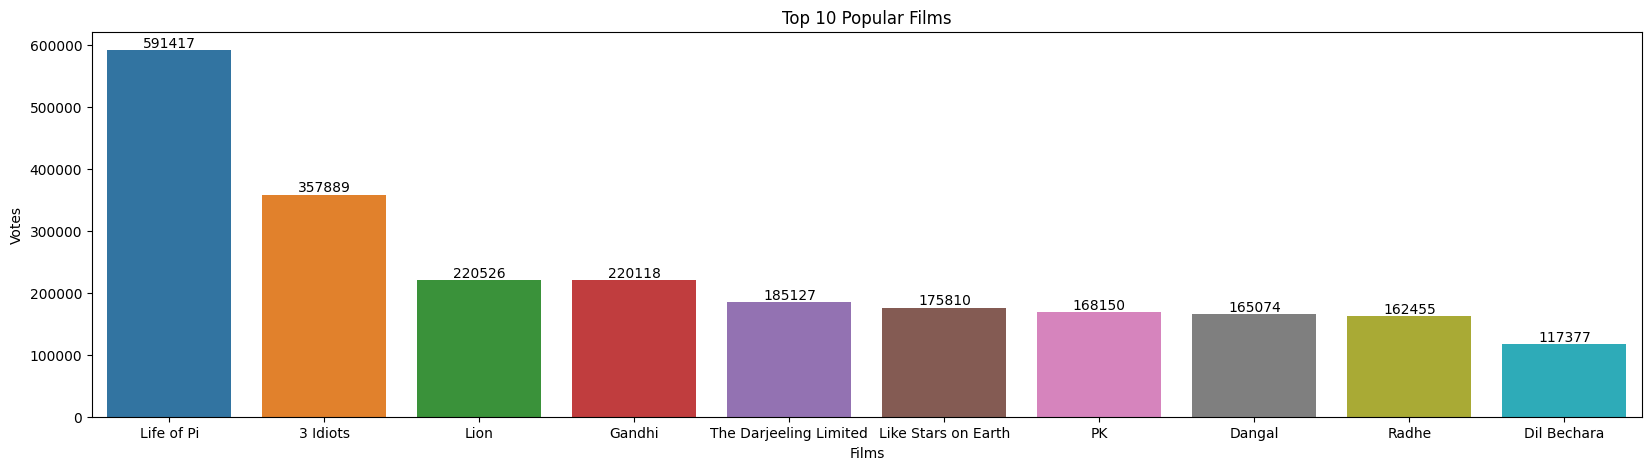

In [31]:
data.sort_values(by="Votes",ascending=False,inplace=True)
top10_popular_films=data["Name"].head(10)
plt.figure(figsize=(20,5))
bar3=sns.barplot(x=top10_popular_films,y=data["Votes"])
bar3.bar_label(bar3.containers[0])
plt.xlabel("Films")
plt.ylabel("Votes")
plt.title("Top 10 Popular Films")
plt.show()

#### TARGET ENCODING

In [40]:
data["Genre"]=data.groupby("Genre")["Rating"].transform("mean")
data["Director"]=data.groupby("Director")["Rating"].transform("mean")
data["Actor 1"]=data.groupby("Actor 1")["Rating"].transform("mean")
data["Actor 2"]=data.groupby("Actor 2")["Rating"].transform("mean")
data["Actor 3"]=data.groupby("Actor 3")["Rating"].transform("mean")
data["Name"]=data.groupby("Name")["Rating"].transform("mean")

In [41]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,7.9,2012.0,127.0,5.735424,7.9,591417.0,7.90,7.900000,5.873037,7.525000
75,8.4,2009.0,170.0,5.856723,8.4,357889.0,8.06,6.827273,6.257143,8.400000
8233,8.0,2016.0,118.0,5.839962,8.0,220526.0,8.00,7.800000,8.000000,8.000000
4848,8.0,1982.0,191.0,5.874443,8.0,220118.0,8.00,8.000000,8.000000,6.450811
14038,7.2,2007.0,91.0,5.814853,7.2,185127.0,7.20,5.650000,7.200000,7.200000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 8219 to 8339
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  float64
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     11085 non-null  float64
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  float64
 7   Actor 1   11085 non-null  float64
 8   Actor 2   11085 non-null  float64
 9   Actor 3   11085 non-null  float64
dtypes: float64(10)
memory usage: 952.6 KB


ALL COLUMNS ARE NUMERIC TYPE NOW

# FEATURE  ENGINEERING

In [43]:
features=data.drop("Rating",axis=1)
target=data["Rating"]

#### MUTUAL INFORMATION GAIN

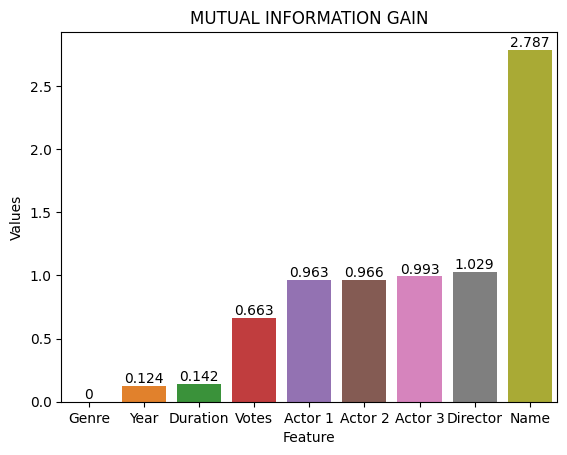

In [44]:
values=mutual_info_regression(features,target)
mutual_info=pd.Series(values)
mutual_info.index=features.columns
df=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df.sort_values(ascending=True,by="Values",inplace=True)
df["Values"]=df["Values"].round(3)
bar2=sns.barplot(x="Feature",y="Values",data=df)
bar2.bar_label(bar2.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()

#### CORRELATION

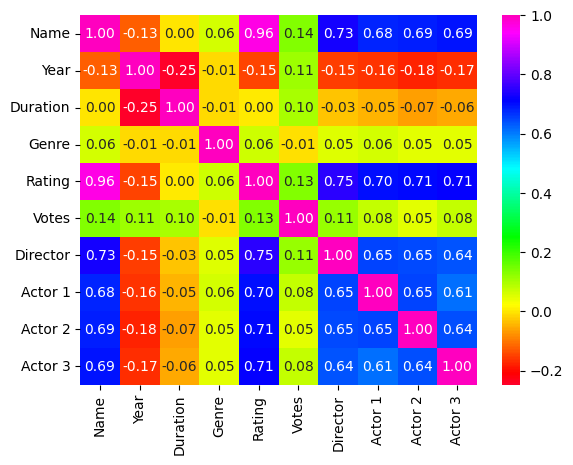

In [45]:
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='gist_rainbow')
plt.show()

#### DROPPING DURATION AS IT IS NOT SIGNIFICANT

In [46]:
data.drop("Duration",axis=1,inplace=True)

In [47]:
features=data.drop("Rating",axis=1)

# SPLITTING DATA INTO TRAINING AND TESTING DATA

In [48]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [49]:
x_train.shape

(7759, 8)

In [50]:
x_test.shape

(3326, 8)

# MODEL TRAINING

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

# PERFORMANCE EVALUATION

#### MEAN SQUARED ERROR

In [52]:
mse=mean_squared_error(pred,y_test)
round(mse,2)

0.08

#### R SQUARED VALUE

In [53]:
score=r2_score(pred,y_test)
round(score,2)

0.93

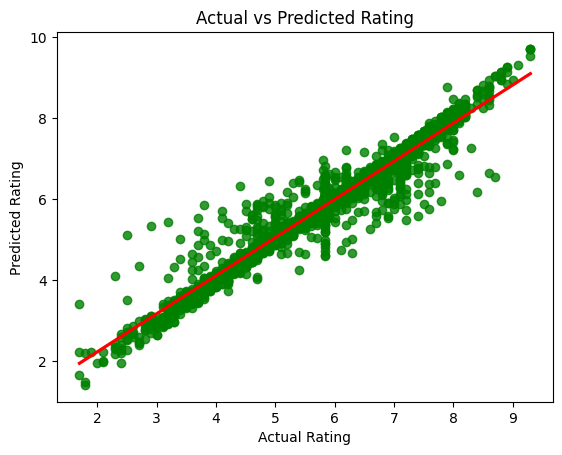

In [54]:
sns.regplot(x=y_test,y=pred,line_kws=dict(color="r"),scatter_kws=dict(color="green"))
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()

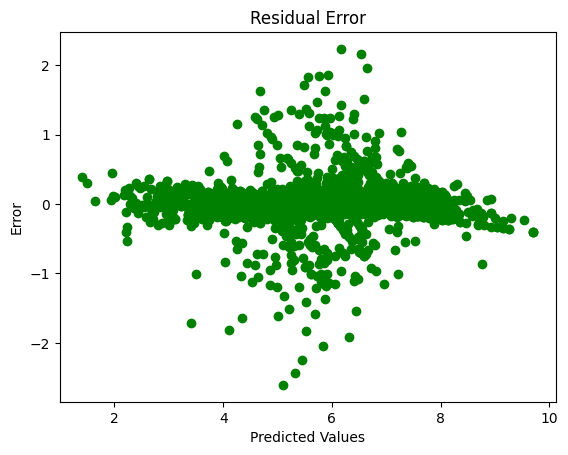

In [55]:
residual=y_test-pred
plt.scatter(x=pred,y=residual,c="green")
plt.xlabel("Predicted Values")
plt.ylabel("Error")
plt.title("Residual Error")
plt.show()